In [ ]:
# The Project is based on Analysis of Chips sales, Customer Segments and Drivers of Sales 

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("C:\\Users\\lutol\\Downloads\\QVI_purchase_behaviour.csv")
df2 = pd.read_csv("C:\\Users\\lutol\\Downloads\\QVI_transaction_data.csv")

In [3]:
import pandas as pd
import re

# extract integers from strings in 'product_name' column
df2['PACK_SIZE'] = df2['PROD_NAME'].apply(lambda x: re.findall(r'\d+', x))

# convert the list of integers to a string
df2['PACK_SIZE'] = df2['PACK_SIZE'].apply(lambda x: ' '.join(x))

# remove the integers from the 'product_name' column
df2['PROD_NAME'] = df2['PROD_NAME'].apply(lambda x: re.sub(r'\d+', '', x))

df2.head()



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,43390,1,1000,1,5,Natural Chip Compny SeaSaltg,2,6.0,175
1,43599,1,1307,348,66,CCs Nacho Cheese g,3,6.3,175
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken g,2,2.9,170
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion g,5,15.0,175
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili g,3,13.8,150


In [11]:
# define a function to extract brand names and pack sizes
def extract_brand(PROD_NAME):
    words = PROD_NAME.split()
    brand = ' '.join(words[:2]) # extract first two words as brand name
    brand = brand.replace('&', '').replace('+', '') # remove special characters
    return (brand)

# apply the function to create new columns "brand" and "pack_size"
df2[['BRAND']] = df2['PROD_NAME'].apply(extract_brand).apply(pd.Series)

# print unique brand names and pack sizes
BRAND = df2['BRAND'].unique()
PACK_SIZE = df2['PACK_SIZE'].unique()
print(BRAND)
print(PACK_SIZE)


['Natural Chip' 'CCs Nacho' 'Smiths Crinkle' 'Smiths Chip'
 'Kettle Tortilla' 'Old El' 'Grain Waves' 'Doritos Corn'
 'Kettle Sensations' 'Twisties Cheese' 'WW Crinkle' 'Thins Chips'
 'CCs Original' 'Burger Rings' 'NCC Sour' 'Cheezels Cheese' 'Infzns Crn'
 'Kettle Sea' 'Kettle Original' 'Red Rock' 'Pringles Sthrn'
 'Pringles SweetSpcy' 'Smiths Thinly' 'Kettle Chilli' 'Doritos Mexicana'
 'Natural ChipCo' 'Dorito Corn' 'Twisties Chickeng' 'Kettle Mozzarella'
 'Infuzions Thai' 'Smith Crinkle' 'Kettle Honey' 'Infuzions BBQ'
 'GrnWves Plus' 'Tyrrells Crisps' 'Kettle Sweet' 'Doritos Salsa'
 'Kettle g' 'Pringles SourCream' 'Cobs Popd' 'Woolworths Mild'
 'French Fries' 'Pringles Original' 'RRD Chilli' 'WW Original'
 'Thins Potato' 'Smiths Crnkle' 'WW D/Style' 'Pringles Chicken'
 'Tostitos Lightly' 'Cheetos Puffs' 'RRD Sweet' 'Tostitos Splash'
 'Woolworths Medium' 'CCs Tasty' 'Woolworths Cheese' 'Tostitos Smoked'
 'Pringles Barbeque' 'WW Supreme' 'Pringles Mystery' 'Snbts Whlgrn'
 'Cheetos Chs' 

In [13]:
df_merged = pd.merge(df1, df2, on='LYLTY_CARD_NBR')
df3 = df_merged[['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES','BRAND','PACK_SIZE']]
df3.head()


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,PACK_SIZE
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSaltg,2,6.0,Natural Chip,175
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli g,1,2.7,Red Rock,150
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives G,1,3.6,Grain Waves,210
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckng,1,3.0,Natural ChipCo,175
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips g,1,1.9,WW Original,160


In [16]:
df3 = df3.copy()
df3.loc[:, 'DATE'] = pd.to_datetime(df3['DATE'], unit='ns')


C:\Users\lutol\AppData\Local\Temp\ipykernel_66180\3964433538.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df3.loc[:, 'DATE'] = pd.to_datetime(df3['DATE'], unit='ns')


In [27]:
df3.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,PACK_SIZE
0,1000,YOUNG SINGLES/COUPLES,Premium,1539734400000000000,1,1,5,Natural Chip Compny SeaSaltg,2,6.0,Natural Chip,175
1,1002,YOUNG SINGLES/COUPLES,Mainstream,1537056000000000000,1,2,58,Red Rock Deli Chikn&Garlic Aioli g,1,2.7,Red Rock,150
2,1003,YOUNG FAMILIES,Budget,1551916800000000000,1,3,52,Grain Waves Sour Cream&Chives G,1,3.6,Grain Waves,210
3,1003,YOUNG FAMILIES,Budget,1552003200000000000,1,4,106,Natural ChipCo Hony Soy Chckng,1,3.0,Natural ChipCo,175
4,1004,OLDER SINGLES/COUPLES,Mainstream,1541116800000000000,1,5,96,WW Original Stacked Chips g,1,1.9,WW Original,160


In [109]:
df3['DATE'] = pd.to_datetime(df3['DATE'], unit='ns')



In [31]:
df3.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,2.648360e+05,264836.00000,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,1.355495e+05,135.08011,1.351583e+05,56.583157,1.907309,7.304200
std,8.057998e+04,76.78418,7.813303e+04,32.826638,0.643654,3.083226
min,1.000000e+03,1.00000,1.000000e+00,1.000000,1.000000,1.500000
25%,7.002100e+04,70.00000,6.760150e+04,28.000000,2.000000,5.400000
50%,1.303575e+05,130.00000,1.351375e+05,56.000000,2.000000,7.400000
75%,2.030942e+05,203.00000,2.027012e+05,85.000000,2.000000,9.200000
max,2.373711e+06,272.00000,2.415841e+06,114.000000,200.000000,650.000000


In [33]:
df3.corr()

C:\Users\lutol\AppData\Local\Temp\ipykernel_66180\3136175663.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr()


,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
LYLTY_CARD_NBR,1.000000,0.950869,0.954919,0.001755,0.003834,0.002908
STORE_NBR,0.950869,1.000000,0.997593,0.002309,0.005295,0.003234
TXN_ID,0.954919,0.997593,1.000000,0.002544,0.005343,0.003468
PROD_NBR,0.001755,0.002309,0.002544,1.000000,-0.004813,-0.133851
PROD_QTY,0.003834,0.005295,0.005343,-0.004813,1.000000,0.715307
TOT_SALES,0.002908,0.003234,0.003468,-0.133851,0.715307,1.000000


In [40]:
df3.to_csv("C:\\Users\\lutol\\Desktop\\Projects\\QVI_clean.csv", index=False)


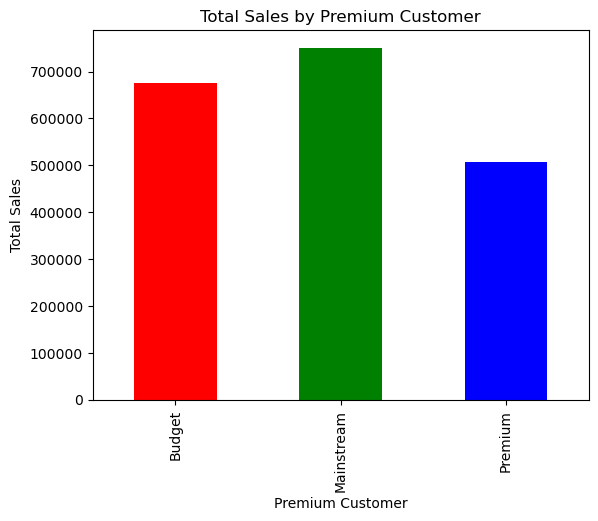

In [58]:
import matplotlib.pyplot as plt

colors = ['red', 'green', 'blue']

df3.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().plot(kind='bar', color=colors)
plt.xlabel('Premium Customer')
plt.ylabel('Total Sales')
plt.title('Total Sales by Premium Customer')
plt.show()



In [ ]:
# This plots shows the customer segments and their purchase behaviour with Mainstream the highest in sales next to Budget and lastly Premium.

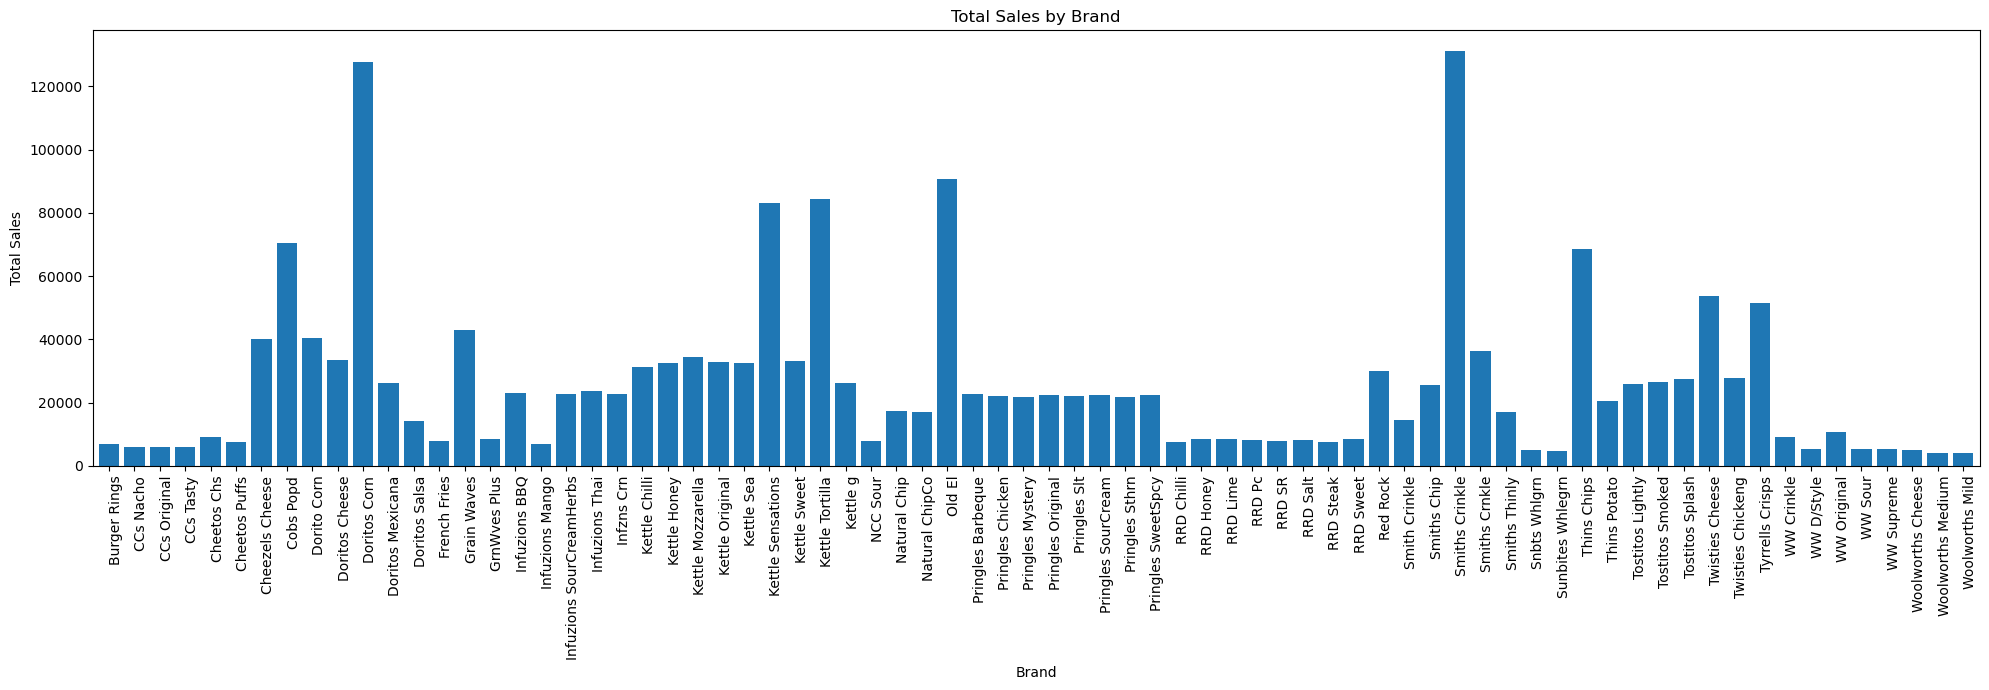

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,7))  # increase the figure size

brand_sales = df3.groupby('BRAND')['TOT_SALES'].sum()
brand_sales.plot(kind='bar', width=0.8)  # adjust the bar width
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.title('Total Sales by Brand')
plt.xticks(rotation=90, ha='left')  # adjust rotation and alignment of x-tick labels
plt.tight_layout()  # adjust layout to prevent x-tick labels from getting clipped
plt.show()


In [ ]:
# This plot shows the Brands and their total sales values with Doritos Corn & Smiths Crinkle the highest selling brands.

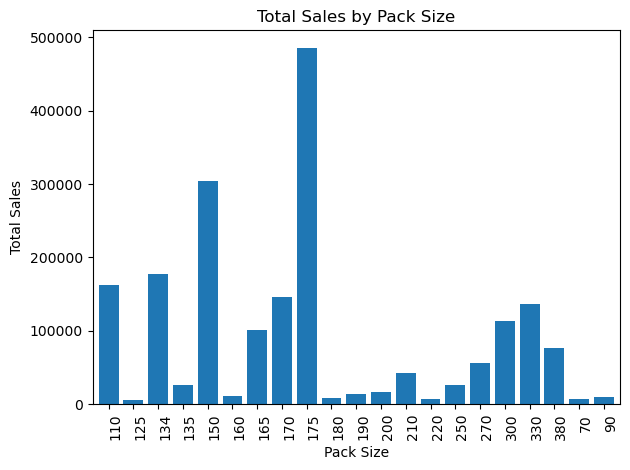

In [59]:
brand_sales = df3.groupby('PACK_SIZE')['TOT_SALES'].sum()
brand_sales.plot(kind='bar', width=0.8)  # adjust the bar width
plt.xlabel('Pack Size')
plt.ylabel('Total Sales')
plt.title('Total Sales by Pack Size')
plt.xticks(rotation=90, ha='left')  # adjust rotation and alignment of x-tick labels
plt.tight_layout()  # adjust layout to prevent x-tick labels from getting clipped
plt.show()



In [ ]:
# This plot shows the Sales based on Pack size with 175g & 150g the highest selling and with 125g, 220g & 70g the least selling. 

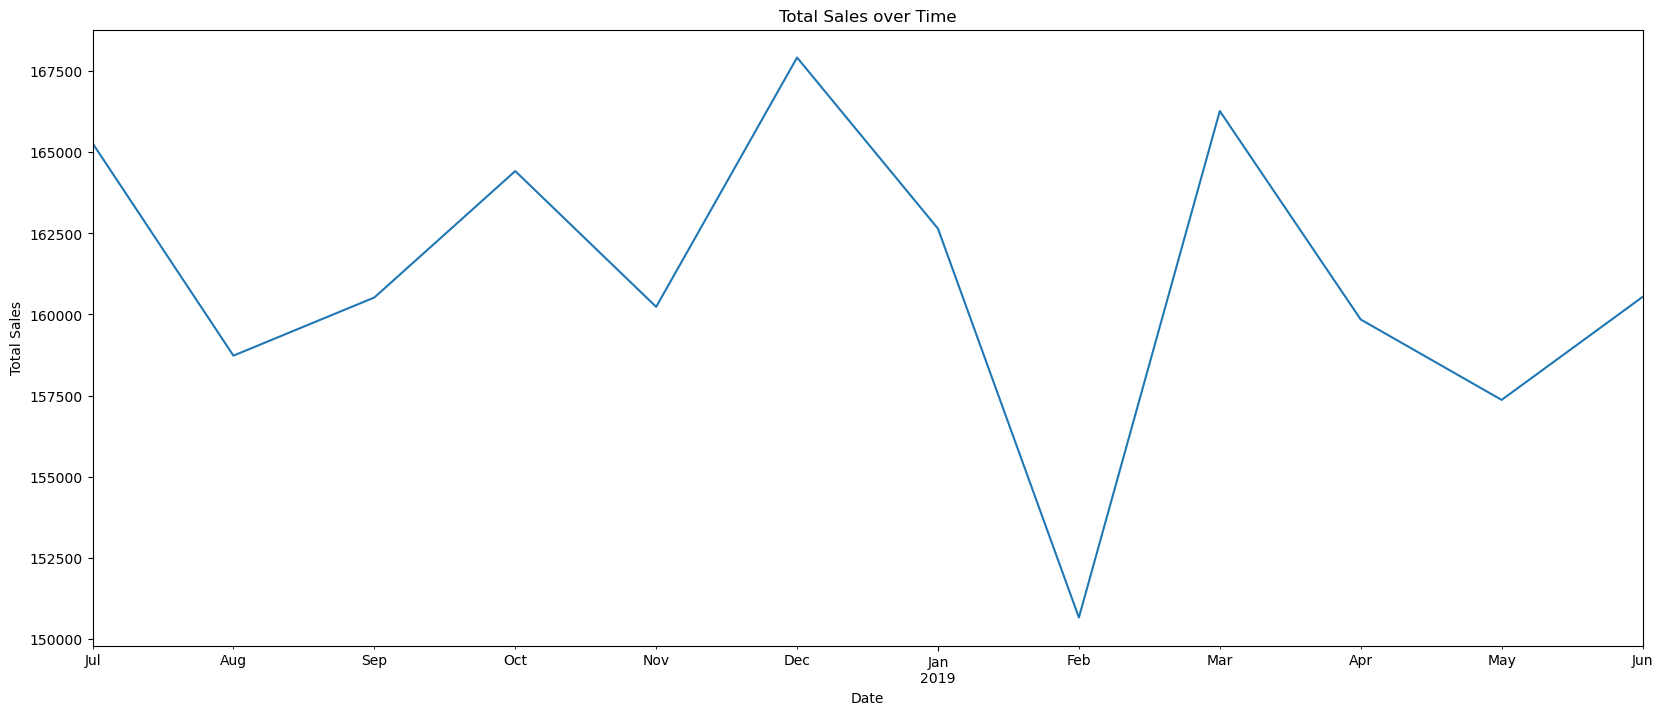

In [93]:
fig, ax = plt.subplots(figsize=(20,8))
df3.set_index('DATE')['TOT_SALES'].resample('M').sum().plot()
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales over Time')
plt.show()


In [ ]:
# This plot shows the Total sales over a time period with the highest sales in Dec 2018 and the least in Feb 2019.

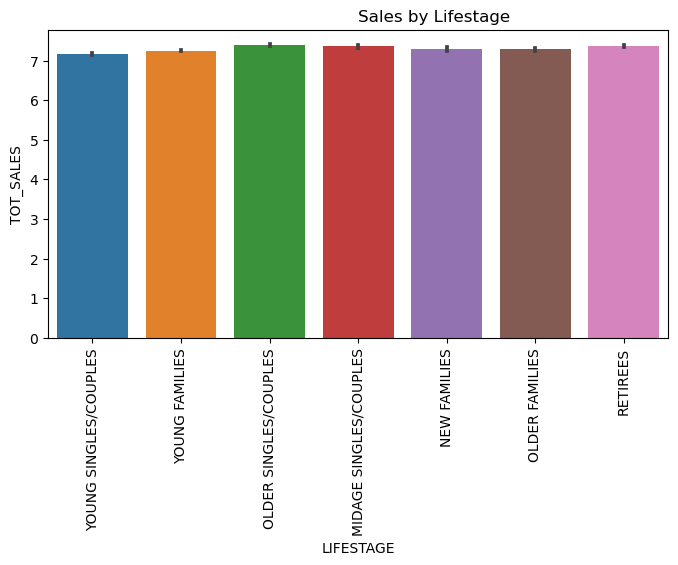

In [79]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,4))  # increase the figure size
sns.barplot(x='LIFESTAGE', y='TOT_SALES', data=df3)
plt.title('Sales by Lifestage', ha='left')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# This Plot shows Older singles / Couples as the most sales in the lifestages and Young Singles / Couples as the least. 

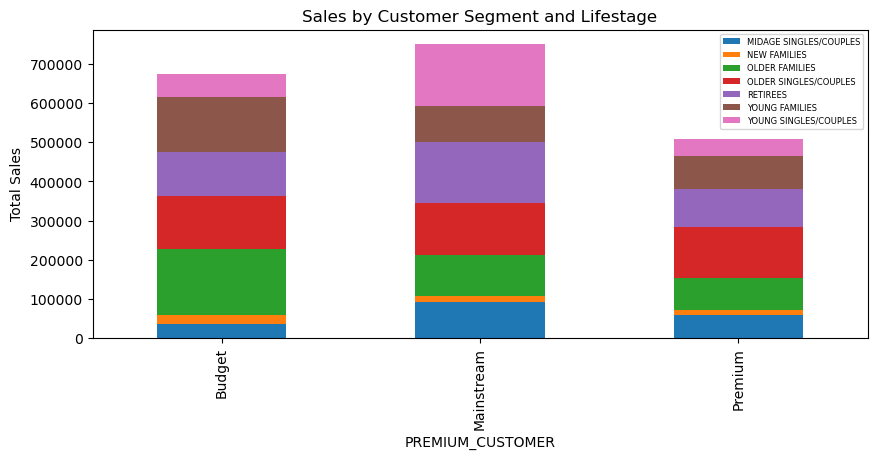

In [86]:
sales_by_customer = df3.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['TOT_SALES'].sum().unstack()
fig, ax = plt.subplots(figsize=(10, 4))
sales_by_customer.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Sales by Customer Segment and Lifestage')
ax.set_ylabel('Total Sales')
ax.legend(loc='upper right', fontsize=6)
plt.show()



In [ ]:
# This plot shows a combination of Totol Sales with Lifestages and Customer segments

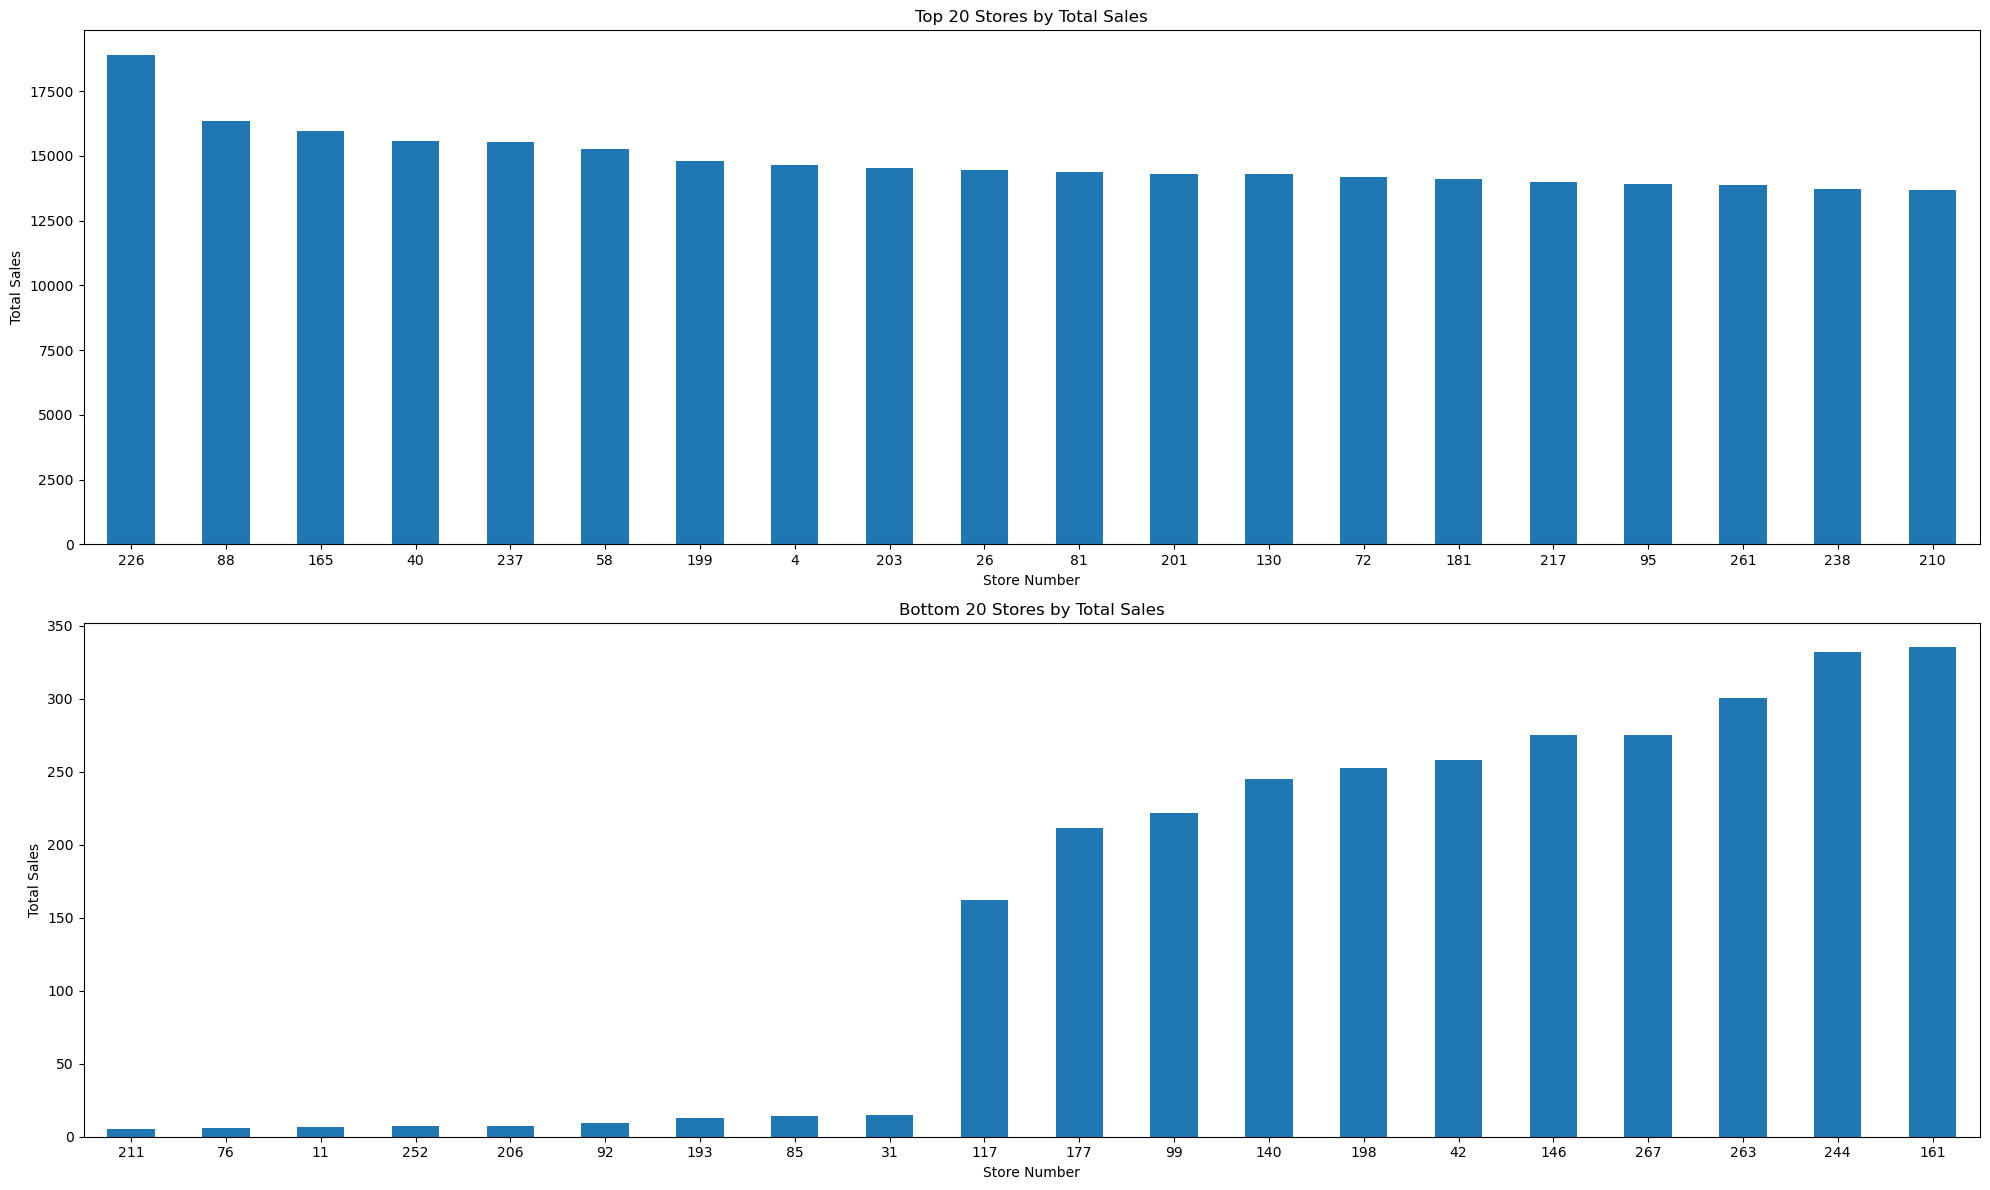

In [99]:

import matplotlib.pyplot as plt

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))

# plot top 20 highest total sales
store_sales = df3.groupby('STORE_NBR')['TOT_SALES'].sum()
top_stores = store_sales.nlargest(20)
top_stores.plot(kind='bar', width=0.5, ax=ax1)  # plot on the first subplot
ax1.set_xlabel('Store Number')
ax1.set_ylabel('Total Sales')
ax1.set_title('Top 20 Stores by Total Sales')
ax1.tick_params(axis='x', labelrotation=0)  # rotate x-tick labels if needed

# plot top 20 lowest total sales
bottom_stores = store_sales.nsmallest(20)
bottom_stores.plot(kind='bar', width=0.5, ax=ax2)  # plot on the second subplot
ax2.set_xlabel('Store Number')
ax2.set_ylabel('Total Sales')
ax2.set_title('Bottom 20 Stores by Total Sales')
ax2.tick_params(axis='x', labelrotation=0)  # rotate x-tick labels if needed

# adjust layout to prevent x-tick labels from getting clipped
plt.tight_layout()

# show the plot
plt.show()


In [ ]:
# This plot shows a list of the Top 20 Most performing and Top 20 Least performing stores.

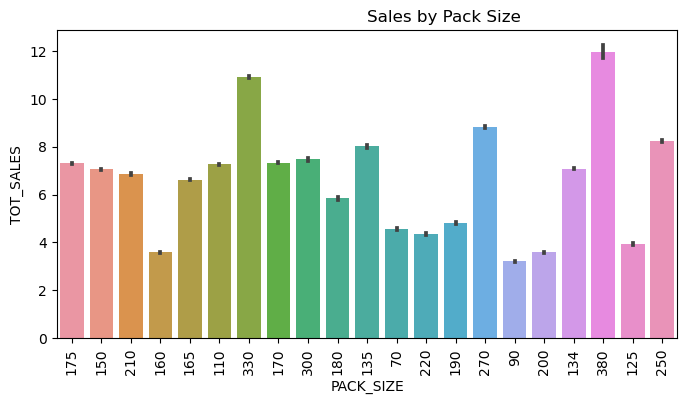

In [101]:
fig, ax = plt.subplots(figsize=(8,4))  # increase the figure size
sns.barplot(x='PACK_SIZE', y='TOT_SALES', data=df3)
plt.title('Sales by Pack Size', ha='left')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# This further explains sales by Pack size

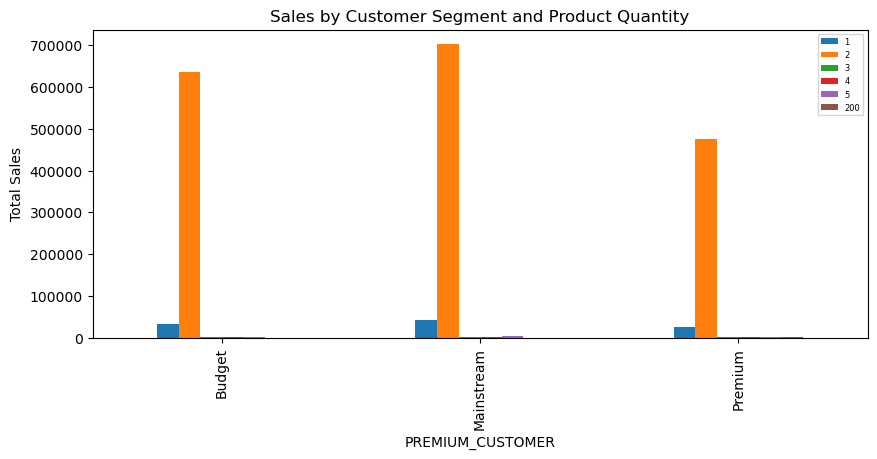

In [103]:
sales_by_customer = df3.groupby(['PREMIUM_CUSTOMER', 'PROD_QTY'])['TOT_SALES'].sum().unstack()
fig, ax = plt.subplots(figsize=(10, 4))
sales_by_customer.plot(kind='bar', ax=ax)
ax.set_title('Sales by Customer Segment and Product Quantity')
ax.set_ylabel('Total Sales')
ax.legend(loc='upper right', fontsize=6)
plt.show()


In [ ]:
# This plot shows Total sales with Product quantity and customer segments with the Quantity of 2 being the most sold.

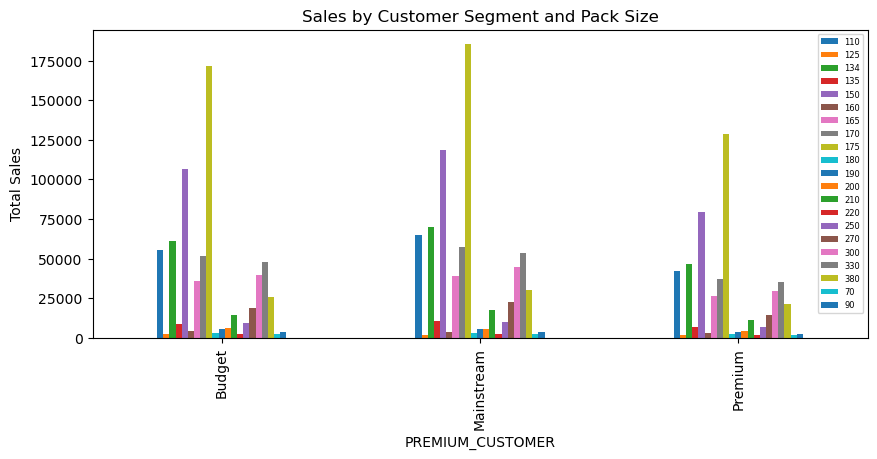

In [108]:
sales_by_customer = df3.groupby(['PREMIUM_CUSTOMER', 'PACK_SIZE'])['TOT_SALES'].sum().unstack()
fig, ax = plt.subplots(figsize=(10, 4))
sales_by_customer.plot(kind='bar', ax=ax)
ax.set_title('Sales by Customer Segment and Pack Size')
ax.set_ylabel('Total Sales')
ax.legend(loc='upper right', fontsize=6)
plt.show()


In [ ]:
# This plot gives a clear visual to understanding Total sales VS Customer segment and Pack Size

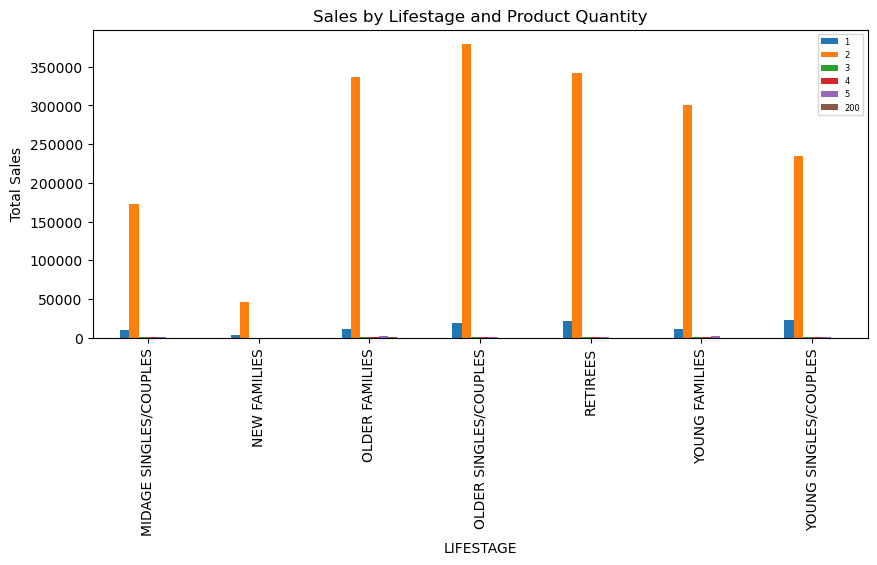

In [105]:
sales_by_customer = df3.groupby(['LIFESTAGE', 'PROD_QTY'])['TOT_SALES'].sum().unstack()
fig, ax = plt.subplots(figsize=(10, 4))
sales_by_customer.plot(kind='bar', ax=ax)
ax.set_title('Sales by Lifestage and Product Quantity')
ax.set_ylabel('Total Sales')
ax.legend(loc='upper right', fontsize=6)
plt.show()


In [ ]:
# This plot explains Total sales vs Product quantity and Lifestage

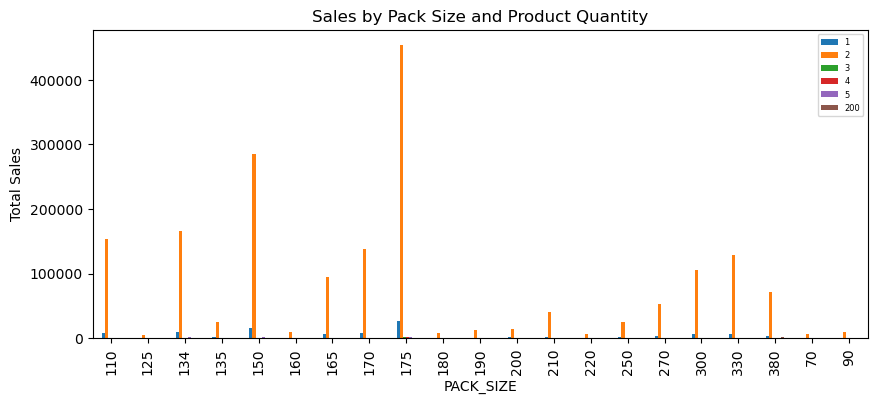

In [106]:
sales_by_customer = df3.groupby(['PACK_SIZE', 'PROD_QTY'])['TOT_SALES'].sum().unstack()
fig, ax = plt.subplots(figsize=(10, 4))
sales_by_customer.plot(kind='bar', ax=ax)
ax.set_title('Sales by Pack Size and Product Quantity')
ax.set_ylabel('Total Sales')
ax.legend(loc='upper right', fontsize=6)
plt.show()

In [ ]:
# This plot explains the Total sales based on the Product quantity and Pack Size

In [ ]:
# Based on the analysis and visualizations the Mainstream customers are the best customer segments based on total sales.
# The pack size 175g is the best performing and is correlated to the Total sales outcomes
# The plots also shows Older singles / couples as the best lifestage but with high competition amongst others
# The Plots shows the best performing pack quantity as 2
# The analysis also states the best brand as Smiths Crinckle
# The best performing store is store 226
# And finally the best performing sales period was Dec 2018.

In [ ]:
# For more details: https://github.com/MoAbbazi?tab=repositories